In [1]:
#Get data for tarfile in Github, extract it in datasets/housing:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

#function to read tarfile and unzip it. And save in datasets/housing
def getdata(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgzpath = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgzpath)
    housing_tgz = tarfile.open(tgzpath)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
housing = getdata()

In [2]:
#From datasets/housing read housing.csv as pd Dataframe. 
import pandas as pd

file_path = os.path.join("datasets/housing", "housing.csv")

def readcsv(path = file_path):
    return pd.read_csv(path)

housing = readcsv()

#checking if csvread was sucessesful and as expected: 
housing.head()
#type(housing) == pd dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Know the data. See how many attributes are missing how many values.. would need to impute..
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#Get a sense data: Categorical variable. 
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
#Get more sense of the data: Quantitative: mean, std, min, max and percentiles. 
housing.describe()

#Inferences: Scales are widely different. Range is huge- population, household, median income. Total_rooms, 
#total_bedroom dont make too much sense. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


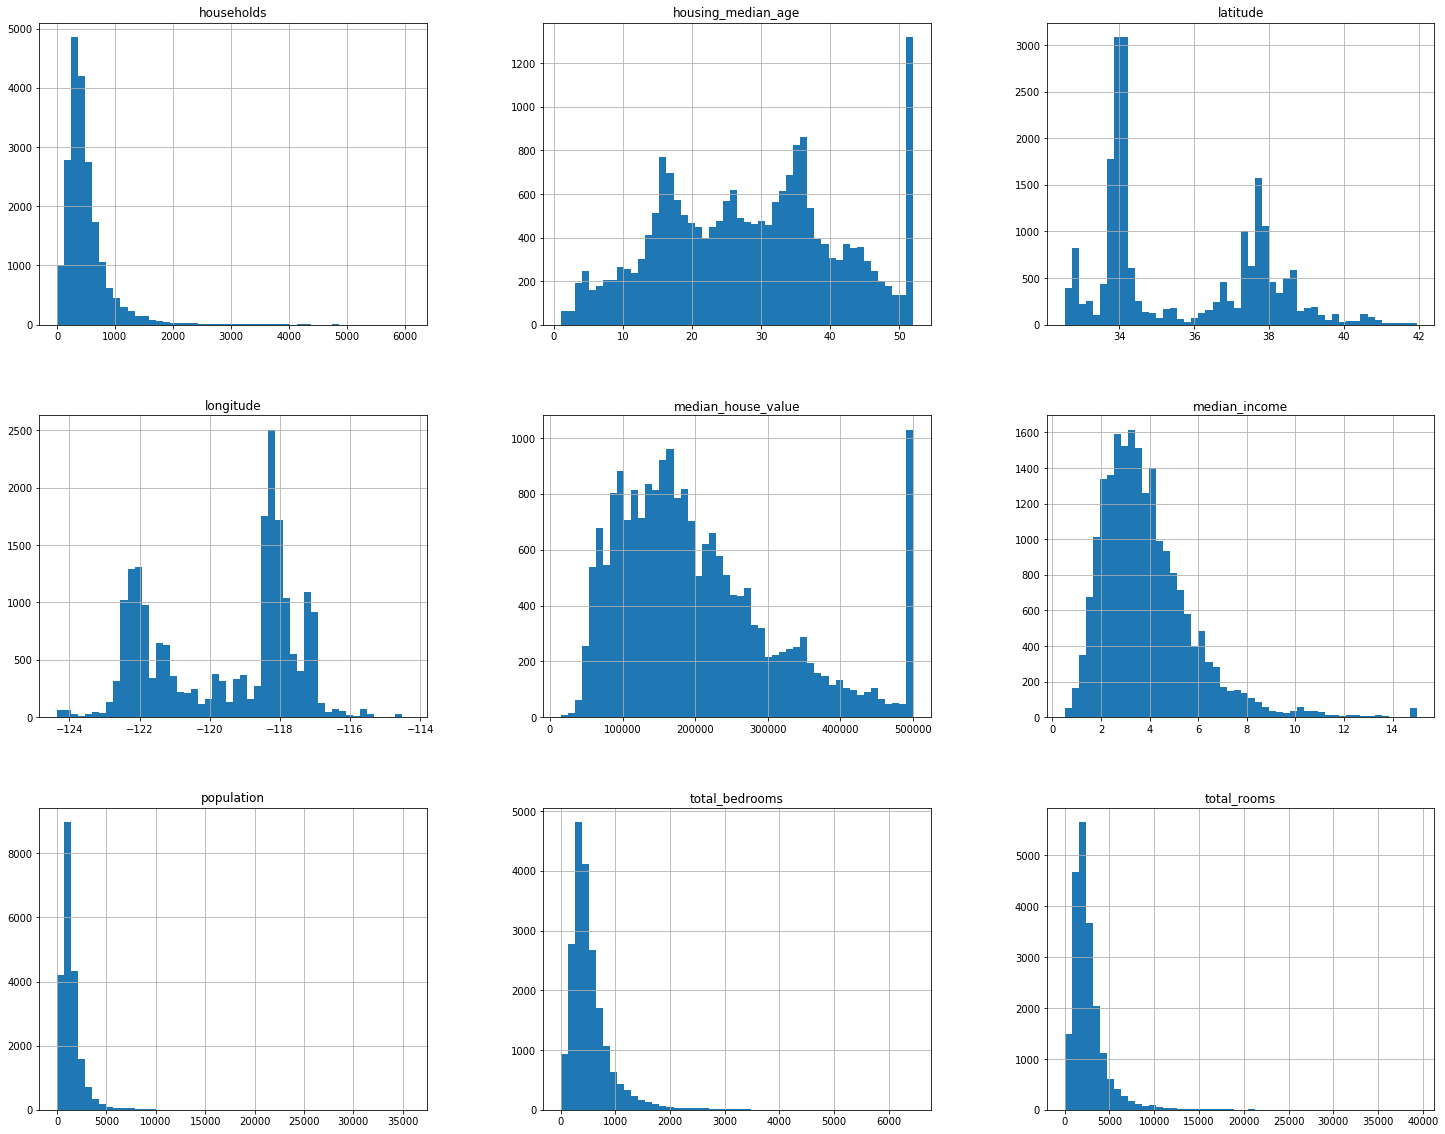

In [6]:
#Get somemore sense of the data, plot histograms for all quant variables. 

%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (25,20))
plt.show()

#Inferences: many attributes are tail-heavy: housing age, housing_value, median_income have max caps. 
#Houses in CA in 1990s costed an average of 100-200k (Haha! Now the downpayments are more than that.).
#Median income is not in USD. 

In [7]:
#Runup to creating a stratified test set based on median income: 

import numpy as np

#Create income categories, (0,1,2,3,4,5).
housing["income_cat"] = np.ceil(housing["median_income"]/1.5) #divide income categories. 
housing["income_cat"].where(housing["income_cat"]<5, 5, inplace = True)
#housing.head()

In [8]:
#Create test set. 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    
    
#Check stratification: 

#housing["income_cat"].value_counts()/len(housing)
#test_set["income_cat"].value_counts()/len(test_set)

#dropping the "income_cat" column.. 
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

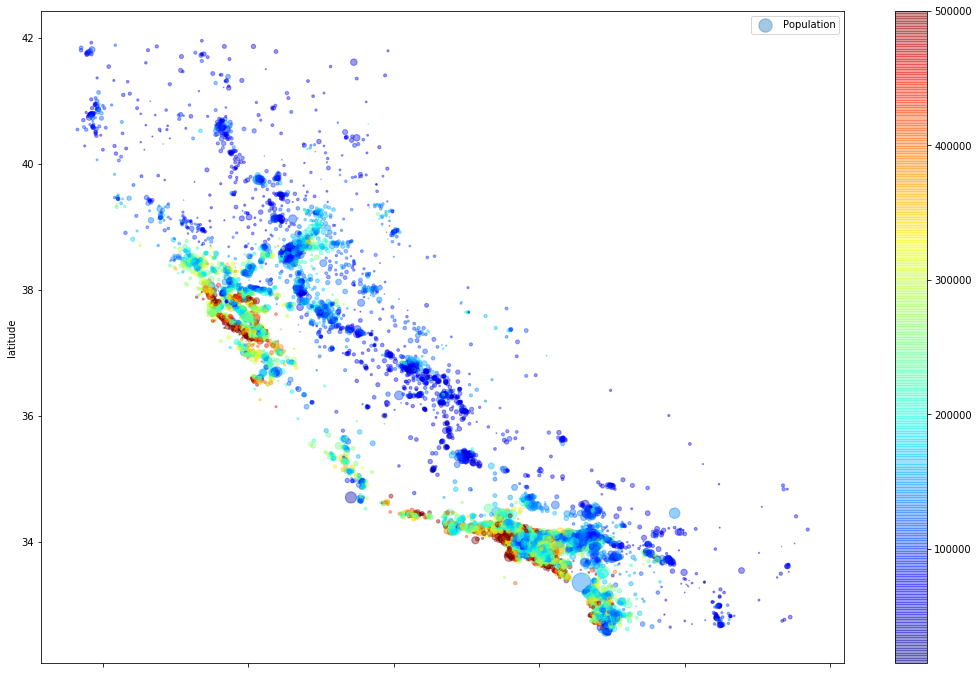

In [9]:
## EXPLORING THE DATA MORE:: 

housing = train_set.copy()
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s = housing["population"]/100, label = "Population"
                , c = housing["median_house_value"], cmap = plt.get_cmap("jet"), colorbar = True, figsize = (18,12))
plt.legend()

In [10]:
#Checking correlation matrix:: 

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

#Inferences: As expected, median_income is a important factor in determining the house value. 

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113e62860>,
      dtype=object)

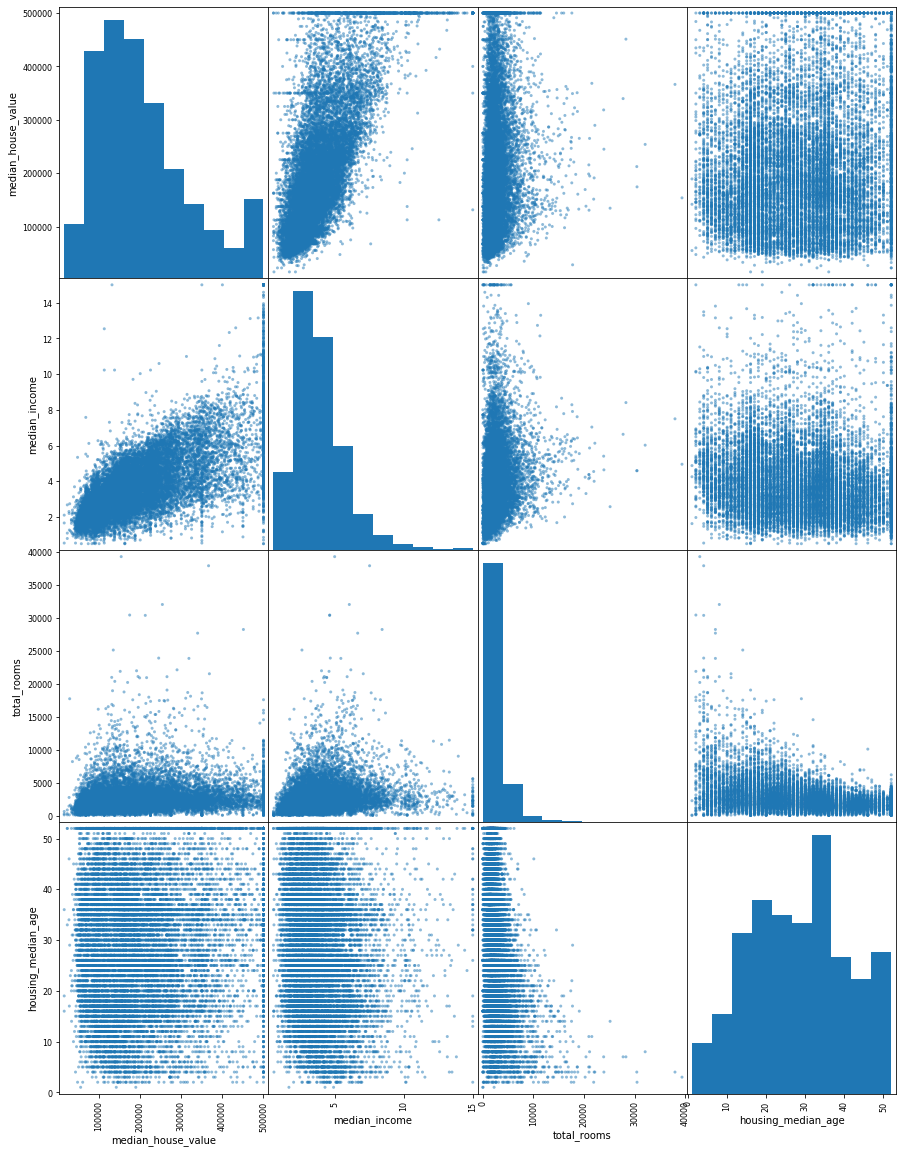

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (15,20))
#Inferences: 

In [12]:
#Checking if rooms/house, bedrooms/room, population/household have significant correlation. 
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [13]:
#Checking correlation with the newly created attributes. 
corr_mat = housing.corr()
corr_mat["median_house_value"].sort_values(ascending = False)

#Inferences: Bedrooms/room is low, implies cost is high. Perhaps rooms like study, gym etc only come with fancies houses. 
#Higher the rooms/household, higher the value of the house. Makes sense. 
#Population_per_household; does not seem to have any strong correlation to the median_house_value. 

median_house_value          1.000000
median_income               0.687160
rooms_per_house             0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [14]:
#Data cleaning.. 

#seperate data from the labels: 
housing = train_set.drop("median_house_value", axis = 1)
housing_labels = train_set["median_house_value"]

In [15]:
#Note that "total_bedrooms" has a few values missing. Replace that with the median.. Imputing with median

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

housing_temp = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_temp)

#housing_temp.info()
X = imputer.transform(housing_temp)
housing_num = pd.DataFrame(X, columns = housing_temp.columns )
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [16]:
#Handling categorical variable = ocean_proximity.. 
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
housing_cat = housing["ocean_proximity"]

housing_cat_encoded = encode.fit_transform(housing_cat)

In [186]:
#Changing encoded categorical variables into one-hot boolean attributes. 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

housing_cat_encoded_onehot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_encoded_onehot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [189]:
encoder.categories_

[array([0, 1, 2, 3, 4])]

In [18]:
#Writing a class method to add 2/3 additional attributes; rooms/household, population/household, bedrooms/room (hyper-parameter)
from sklearn.base import BaseEstimator, TransformerMixin

#Indexes of required attributes
rooms_id, bedrooms_id, population_id, households_id = 3, 4, 5, 6

class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room = True):
        self.add_bedroom_per_room = add_bedroom_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:,rooms_id]/X[:,households_id]
        population_per_household =  X[:,population_id]/X[:,households_id]
        if self.add_bedroom_per_room:
            bedroom_per_room =  X[:,bedrooms_id]/X[:,rooms_id]
            return np.c_[X,rooms_per_household, population_per_household, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
adder = AttributeAdder(add_bedroom_per_room = True)
housing_added = adder.transform(housing.values)

In [23]:
#Write a class method to convert pd DataFrame to numpy for data cleaning pipeline: 

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.attribute_names].values

dftoarr = DataFrameSelector(list(housing_num))
npdata = dftoarr.transform(housing_num)

class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [114]:
num_attributes = list(housing_num)
cat_attributes = "ocean_proximity"

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer


num_pipeline = Pipeline([
                            ('selector', DataFrameSelector(num_attributes)),
                            ('imputer', SimpleImputer(strategy = 'median')),
                            ('attrAdder', AttributeAdder()), 
                            ('sclarer', StandardScaler())
])
cat_pipeline = Pipeline([
                            ('selector', DataFrameSelector(cat_attributes)),
                            ('labelBinarize', LabelBinarizerPipelineFriendly())
])

full_pipeline = FeatureUnion(transformer_list = [
                                ("num_pipeline", num_pipeline), 
                                ("cat_pipeline", cat_pipeline)
])

In [115]:
housing_prepared = full_pipeline.fit_transform(housing)
len(housing_prepared[1,:])

16

In [116]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data= housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [117]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [128]:
from sklearn.metrics import mean_squared_error as mse

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

calc_mse = mse(lin_reg.predict(housing_prepared), housing_labels)
calc_rmse = np.sqrt(calc_mse)
print(calc_rmse)
#Clearly underfitting.. 

68628.19819848923


In [156]:
#Cross validation: 

from sklearn.model_selection import cross_val_score

def summarizescores(scores):
    print("Scores: ", scores)
    print("Mean Score: ", scores.mean())
    print("Standard Deviation of Scores: ", scores.std())

linscores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
linreg_rmse_scores= np.sqrt(-linscores)

summarizescores(linreg_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean Score:  69052.46136345083
Standard Deviation of Scores:  2731.674001798344


In [169]:
#Trying a RF Regressor: 

from sklearn.ensemble import RandomForestRegressor as RFR

forest_reg = RFR()
forest_reg.fit(housing_prepared, housing_labels)

rfmsescores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rfrmse_scores = np.sqrt(-rfmsescores)
summarizescores(rfrmse_scores)

#better than lin_reg model.. viz. with 10 fold cross validation. 

Scores:  [49753.03992868 47771.64986198 49901.36245274 51843.79499726
 49951.23140349 53531.98253441 49150.54788608 48163.56269269
 53008.15010946 50237.26796529]
Mean Score:  50331.25898320824
Standard Deviation of Scores:  1817.0066284370694


In [174]:
#Fine tuning: Hyper parameter grid search. 

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}]

forest_reg = RFR()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [175]:
#best parameters obtained were at features = 8, n_estimators = 30. Increasing limits.. 
#best parameters updated to features = 6, estimators = 40
param_grid = [{'n_estimators': [10,30, 35, 40], 'max_features': [4,6,8,10,12]},
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}]

forest_reg = RFR()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 6, 'n_estimators': 40}

In [191]:
#Printing out the mean scores.. best model has mean score = 49721, better than 50331 obtained before. 
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52493.62744299238 {'max_features': 4, 'n_estimators': 10}
50435.29450663813 {'max_features': 4, 'n_estimators': 30}
50248.831475287254 {'max_features': 4, 'n_estimators': 35}
50435.440454048134 {'max_features': 4, 'n_estimators': 40}
52150.519655840624 {'max_features': 6, 'n_estimators': 10}
49854.64518139054 {'max_features': 6, 'n_estimators': 30}
49952.369952389185 {'max_features': 6, 'n_estimators': 35}
49721.01551420078 {'max_features': 6, 'n_estimators': 40}
52152.922965233985 {'max_features': 8, 'n_estimators': 10}
50270.20364669988 {'max_features': 8, 'n_estimators': 30}
49893.59482062571 {'max_features': 8, 'n_estimators': 35}
49726.04561292837 {'max_features': 8, 'n_estimators': 40}
52539.90844326223 {'max_features': 10, 'n_estimators': 10}
50250.215141372304 {'max_features': 10, 'n_estimators': 30}
49737.00402873527 {'max_features': 10, 'n_estimators': 35}
50026.8377811246 {'max_features': 10, 'n_estimators': 40}
52515.54233436503 {'max_features': 12, 'n_estimators': 10}
5046

In [223]:
#Get information on importance of each features...
#Inferences: Important cat variables are only INLAND. Other have low importance. 
#Can consider removing lesser important attr. 

feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

extra_attr = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot = [ "<1H OCEAN","INLAND","ISLAND", "NEAR BAY" , "NEAR OCEAN"]

all_attr = num_attributes + extra_attr + cat_one_hot
sorted(zip(feature_importance, all_attr), reverse = True)

[(0.3666834375641405, 'median_income'),
 (0.13268782374506766, 'INLAND'),
 (0.11137178540545738, 'population_per_household'),
 (0.07166944962330979, 'longitude'),
 (0.06906677397903115, 'latitude'),
 (0.06486978415466575, 'bedrooms_per_room'),
 (0.05486987165971509, 'rooms_per_household'),
 (0.043308281845873584, 'housing_median_age'),
 (0.017884119538956057, 'total_rooms'),
 (0.017199535397174375, 'population'),
 (0.01698476534676911, 'total_bedrooms'),
 (0.01654223058030064, 'households'),
 (0.009664297518918254, '<1H OCEAN'),
 (0.004199158191213003, 'NEAR OCEAN'),
 (0.002936556889268899, 'NEAR BAY'),
 (6.212856013875081e-05, 'ISLAND')]

In [232]:
#Evaluating on Test set.. 

final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis = 1)
Y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predict = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse
#Final rmse close to rmse from cross validation.. Model seems fine! 

47592.032925344836